<figure style="text-align: center;">
    <img src="../../docs/wec-grid-logo.png" alt="Alt text">
    <figcaption>WEC-GRID logo</figcaption>
</figure>


<div align="center">

# Integration of Wave and Current Energy Converters into Microgrids demonstration

</div>

---

### Introduction

In light of the transition towards sustainable energy solutions, **Wave Energy Converters (WECs)** and **Current Energy Converters (CECs)** stand out as pivotal innovations. These technologies offer the potential to harness the vast energy of our oceans. However, their integration into complex systems such as microgrids necessitates rigorous modeling, testing, and analysis. This Jupyter notebook serves as both a demonstration and guide, leveraging an open-source software to address these integration challenges.

---

### Use Case Scenario

The following scenario provides a practical backdrop for our exploration:

- **Grid**: 'Area 1' of the RTS 96 system—a standard in power system testing Figure 1.
- **Devices**:
  - Wave Energy Converters: 'LUPA' model.
  - Current Energy Converter: 'placeholder'.

---

### Moving forward

Navigating through this notebook, we will:
- Run detailed simulations to observe the interactions of the WECs and CEC within a microgrid setting.
- Highlight key features of the software that facilitate smooth integration using 3rd party modelers.
- Identify potential stability or compatibility challenges using built in tools



---

<figure style="text-align: center;">
    <img src="../../docs/The-IEEE-RTS-96-system.png" alt="RTS96 Area 1 (Official)" width="500">
    <figcaption>Figure 1: RTS96 Area 1 (Official) <br><cite>Source: <a href="https://www.researchgate.net/figure/The-IEEE-RTS-96-system_fig5_3213080">ResearchGate Article</a></cite></figcaption>
</figure>


<figure style="text-align: center;">
    <img src="../../docs/WecGrid-flowchart.png" alt="" width="800">
    <figcaption>Figure 2: Wec-Grid flow chart </figcaption>
</figure>

---
### WEC-GRID Initialization

In the cell below we initalize the Wec_grid software by passing a grid topology model. This raw file can be used by the two supported Powerflow solvers softwares PSSE and pyPSA. The communication is being handled by WEC-GRID. 

### PSS®E, Powerflow Solvers

**PSS®E (Power System Simulator for Engineering)** is an industry-standard software application tailored for the analysis and simulation of power systems. Developed by Siemens, PSS®E provides power engineers with tools to simulate and investigate the response of complex power systems to various disturbances. It plays a pivotal role in diverse grid studies, from routine network examinations to specialized research projects.

In the context of our current operations:
- `WecObj.initialize_psse("fnsl")` initializes PSS®E with a specific solver, in this instance, `"fnsl"`.


In [1]:
"""
Imports 
"""
import WEC_GRID as wg  # import the WEC-GRID software
import numpy as np
import pandas as pd


WecObj = wg.Wec_grid(
    "../models/grid_models/IEEE_24_bus.RAW"
)  # initialize Object with Grid file (figure 1)

WecObj.initalize_psse("fnsl")  # initalize PSSe with solver

    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 Messages for api REPORT_OUTPUT
 PSS(R)E not properly initialized   (006075)

 Input error detected at !
 -m ipykernel_launcher --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 "--Session.signature_scheme=\"hmac-sha256\"" "--Session.key=b\"033db7b3-9269-4390-9b38-c4274cd27a9f\"" --shell=9002 "--transport=\"tcp\"" --iopu
                                                                                                          !

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2023
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specif

1

---

### Reviewing Grid Data using Pandas DataFrame

In the subsequent cell, we utilize the dot operator to access and visualize the grid data encapsulated within the `WecObj` instance. The choice of using **Pandas** for this representation is influenced by its rich feature set, enabling efficient data manipulation and analysis.

To review the system data in Pandas DataFrame format, execute:



In [9]:
WecObj.psse_dataframe  # review system data in pandas format

,BUS_ID,Bus,BASE,PU,ANGLED,Type,P Gen,Q Gen,P Load,Q Load,P,Q,ΔP,ΔQ,M_Angle,M_Mag
0,1,BUS 1,138.0,1.000000,0.000000,3,35.930069,180.488586,NaN,NaN,35.930069,180.488586,0.000000,-1.192093e-05,1.192093e-05,-1.570796
1,2,BUS 2,138.0,0.997822,0.010373,2,67.000000,0.000000,97.0,20.000000,-30.000000,-20.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
2,3,BUS 3,138.0,0.863703,10.755864,1,NaN,NaN,90.0,19.000000,-90.000000,-19.000000,-0.000012,0.000000e+00,1.192093e-05,3.141593
3,4,BUS 4,138.0,0.887014,-0.415208,1,NaN,NaN,74.0,15.000001,-74.000000,-15.000001,0.000003,-5.960464e-06,6.664002e-06,-1.107149
4,5,BUS 5,138.0,0.927217,-0.229420,1,NaN,NaN,71.0,14.000000,-71.000000,-14.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
5,6,BUS 6,138.0,0.907952,0.391817,1,NaN,NaN,68.0,14.000000,-68.000000,-14.000000,-0.000002,-5.960464e-06,6.365779e-06,-1.929567
6,7,BUS 7,138.0,0.796234,-0.580059,2,64.000000,0.000000,62.0,13.000000,2.000000,-13.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
7,8,BUS 8,230.0,0.805368,-0.868408,1,NaN,NaN,85.0,18.000000,-85.000000,-18.000000,-0.000001,-7.450581e-07,1.343173e-06,-2.553590
8,9,BUS 9,138.0,0.834940,4.989085,1,NaN,NaN,175.0,36.000000,-175.000000,-36.000000,-0.000006,2.235174e-06,6.365779e-06,2.782822
9,10,BUS 10,138.0,0.881702,3.723669,1,NaN,NaN,100.0,23.000000,-100.000000,-23.000000,0.000003,0.000000e+00,2.980232e-06,0.000000


---

### Integrating WEC and CEC into the Power Grid

Using the functions `create_wec` and `create_cec`, we can seamlessly introduce Wave Energy Converters (WECs) and Current Energy Converters (CECs) to specific bus locations within our grid system.

In the provided code:

- `WecObj.create_wec(ID=1, model="LUPA", bus_location=21)`: A WEC with the model name "LUPA" is integrated at bus 21.
- `WecObj.create_wec(ID=2, model="LUPA", bus_location=2)`: Another WEC, again of the "LUPA" model, is integrated at bus 2.
- `WecObj.create_wec(ID=3, model="LUPA", bus_location=7)`: A third WEC with the "LUPA" model is placed at bus 7.
- `WecObj.create_cec(ID=6, model="CEC", bus_location=14)`: A CEC is integrated at bus 14.

As illustrated in **Figure 2**, the functions retrieve necessary data and parameters for each WEC and CEC from a shared SQL database. This ensures that each converter is modeled accurately based on existing data, providing a realistic simulation environment. This also allows for simulations to be ran only when neccessary. 

In [10]:
# create WEC / CECs
WecObj.create_wec(ID=1, model="LUPA", bus_location=15)
WecObj.create_wec(ID=2, model="LUPA", bus_location=2)
WecObj.create_wec(ID=3, model="LUPA", bus_location=7)
WecObj.create_cec(ID=6, model="CEC", bus_location=14)

# let beef up that generation
for wec in WecObj.wec_list:
    wec.dataframe["pg"] = wec.dataframe["pg"] * 5  # 5 wecs in series

---
### Visualizing the Power Grid with `viz()`

The function `WecObj.viz()` provides a dynamic visualization of the power grid. This visual representation is instrumental in offering an intuitive understanding of the grid's structure, its components, and their respective characteristics. 

In this visualization:
- **Green**: Represents a **PV Bus**. These buses are where the system voltage magnitude is controlled by adjusting the real power output of the machine, typically a generator, to the system.
- **Grey**: Denotes a **PQ Bus**. These are load buses where both active (P) and reactive (Q) powers are specified.
- **Red**: Signifies a **Swing Bus**. This bus acts as a reference in the power system, and its voltage magnitude and angle are predefined. All power system calculations are based relative to this bus.
- **Blue**: Represents a bus with **WEC or CEC**. These buses are designated for the integration of Wave Energy Converters (WECs) or Current Energy Converters (CECs) into the grid.

Understanding these bus types and their representations is crucial for anyone involved in power system studies. The color-coded visualization provides a rapid, high-level understanding of grid dynamics and can aid in pinpointing areas of interest or potential issues.


In [11]:
WecObj._psse_viz()

---
### Integration with WEC-SIM and the LUPA Model

The function `run_WEC_Sim` integrates with the renowned MATLAB-based software, **WEC-SIM** (Wave Energy Converter SIMulator). WEC-SIM is a time-domain modeling tool developed for wave energy converters. It facilitates the study of these converters' dynamics and their responses to waves, allowing for a comprehensive analysis of their performance.

For our simulations, we utilize the **LUPA** model. When calling `run_WEC_Sim`, the function internally invokes the MATLAB engine, seamlessly bridging our Python environment with the capabilities of MATLAB and WEC-SIM. This integration ensures that our simulations leverage the robustness and accuracy of the LUPA model within WEC-SIM, providing results that are both reliable and reflective of real-world scenarios.


### Running WEC-SIM / CEC 

To run the simulation for the Wave Energy Converters (WECs) and Current Energy Converters (CECs) integrated into the grid, we'd typically use the following setup and commands:

```python
config = {
    "simLength": 60 * 60 * 8,         # Simulation length of 8 hours
    "Tsample": 300,                   # Sampling time of 5 minutes
    "waveHeight": 2.5,                # Wave height in meters
    "wavePeriod": 8,                  # Wave period in seconds
    "waveSeed": np.random.randint(999999999),   # Random seed for wave patterns
}

# Run the simulation for WEC with ID=1
config["wec_id"] = 1
WecObj.run_WEC_Sim(wec_id=1, sim_config=config)

# Run the simulation for WEC with ID=2
config["wec_id"] = 2
WecObj.run_WEC_Sim(wec_id=2, sim_config=config)

# Run the simulation for WEC with ID=3
config["wec_id"] = 3
WecObj.run_WEC_Sim(wec_id=3, sim_config=config)

# Run the simulation for CEC with ID=6 with a different simulation length
WecObj.run_CEC_Sim(6, sim_config={"sim_length": 1200})  # Simulation length of 20 minutes
```



---
### Generating Load Curves Based on Peak Values

Load curves provide essential insights into how the electrical load varies over a specific period, usually daily. They depict the power demand in the grid at different times and are crucial for planning, designing, and operating power systems. Using the Wec-Grid function below we can create basic load curves based on known peak load values.


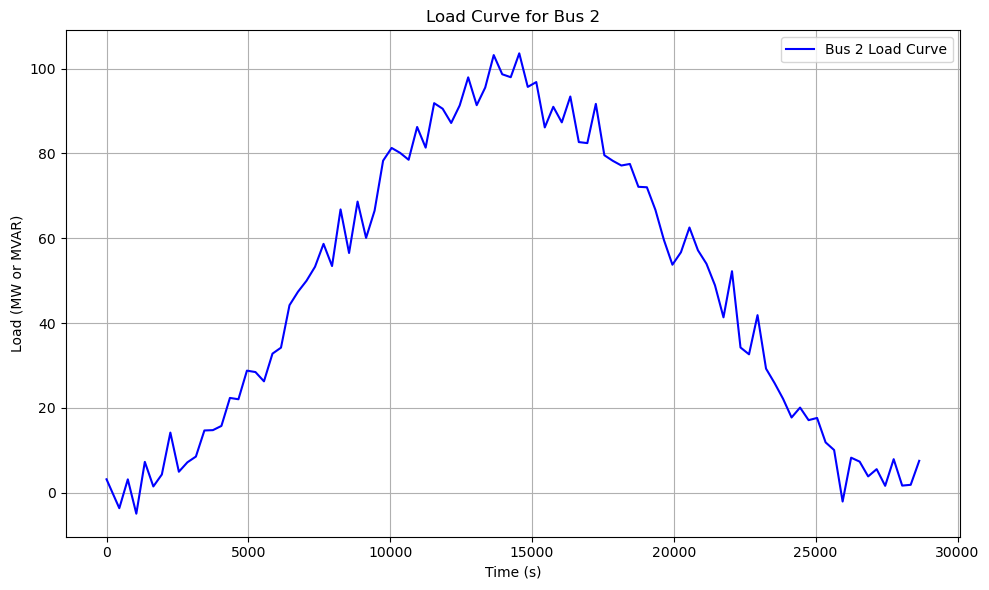

In [12]:
peak_values = {
    1: 0,
    2: 97.000,
    3: 90.000,
    4: 74.000,
    5: 71.000,
    6: 68.000,
    7: 62.000,
    8: 85.000,
    9: 175.000,
    10: 100.000,
    11: 0,
    12: 0,
    13: 130.000,
    14: 92.000,
    15: 158.000,
    16: 100.000,
    17: 0,
    18: 162.000,
    19: 90.000,
    20: 65.000,
    21: 0,
    22: 0,
    23: 0,
    24: 0,
}

WecObj._generate_all_load_profiles(
    peak_values, curve_type="summer", noise_type="gaussian", noise_level=5
)
WecObj.plot_load_curve(bus_id=2)

---
### Integration Simulation via AC Injection

The next stage of our analysis involves the integration of the results from the WEC-SIM simulation into our grid model. This is achieved through an AC injection method. AC injection allows us to simulate the addition of active and reactive power into our grid based on the outputs from the Wave Energy Converters. The output is console output from PSSe




In [13]:
time = WecObj.wec_list[0].dataframe.time.to_list()[-1]
WecObj._psse_ac_injection(start=0, end=(time))

# TODO
# need to update if there is not load curve


 Power flow data changed for machine "1" at bus 15 [15          230.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    274.000         0.00000      PG

 Power flow data changed for bus 15 [15          230.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.885209         1.00000      VM

 Power flow data changed for load "1" at bus 15 [15          230.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    158.000        -1.73032      PL
    32.0000         0.00000      QL
 "            "  "CONSTP      "  LODTYP

 Power flow data changed for machine "1" at bus 2 [2           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    67.0000         0.00000      PG

 Power flow data changed for bus 2 [2           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.997822         1.00000      VM

 Power flow data changed for load "1" at bus 2 [2           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    97.0000         3.19512      PL
    20.0000         0.00000      QL
 "       

---
### Reviewing the Simulation Results

Once the simulation and AC injection are complete, we have tools in place to review and assess the impact on our grid. Specifically, the `WecObj._psse_plot_bus` function offers a comprehensive view of the grid's performance at specified bus numbers.

Before we utilize this function, let's gain a deeper understanding of the key parameters we'll be observing:

- **ΔP (Mismatch Delta of Active Power)**: This parameter quantifies the deviation or mismatch of the actual active power (P) from the expected or reference value at a specific bus. Large deviations might indicate imbalances or potential stability issues within the grid.

- **ΔQ (Mismatch Delta of Reactive Power)**: Similarly, this metric captures the deviation of the actual reactive power (Q) from its reference value. Reactive power management is crucial in maintaining the voltage profile of a grid. Observing ΔQ can offer insights into potential voltage stability challenges.

By monitoring these deltas, especially at pivotal points like the swing bus, we can extract vital insights about the grid's health and stability. The swing bus, in particular, acts as a reference point in the grid, balancing power and ensuring stability. Significant variations in its ΔP and ΔQ can be indicative of overarching grid health.

With this context in mind, in the subsequent code cell, we'll utilize the `WecObj._psse_plot_bus` function to visualize these parameters for a chosen bus and time range.


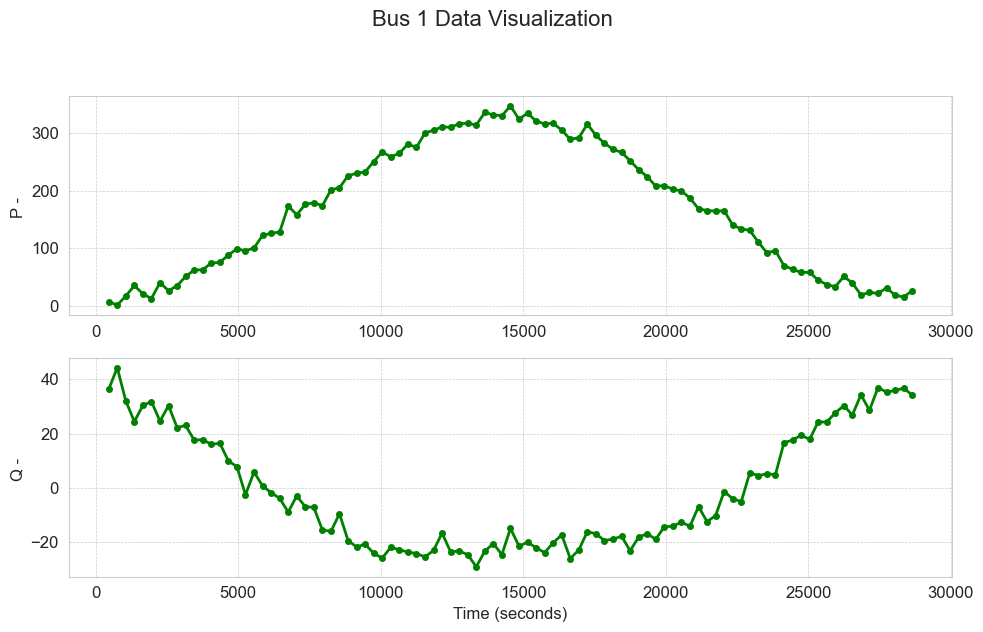

In [14]:
WecObj._psse_plot_bus(bus_num=1, time=[1, time])

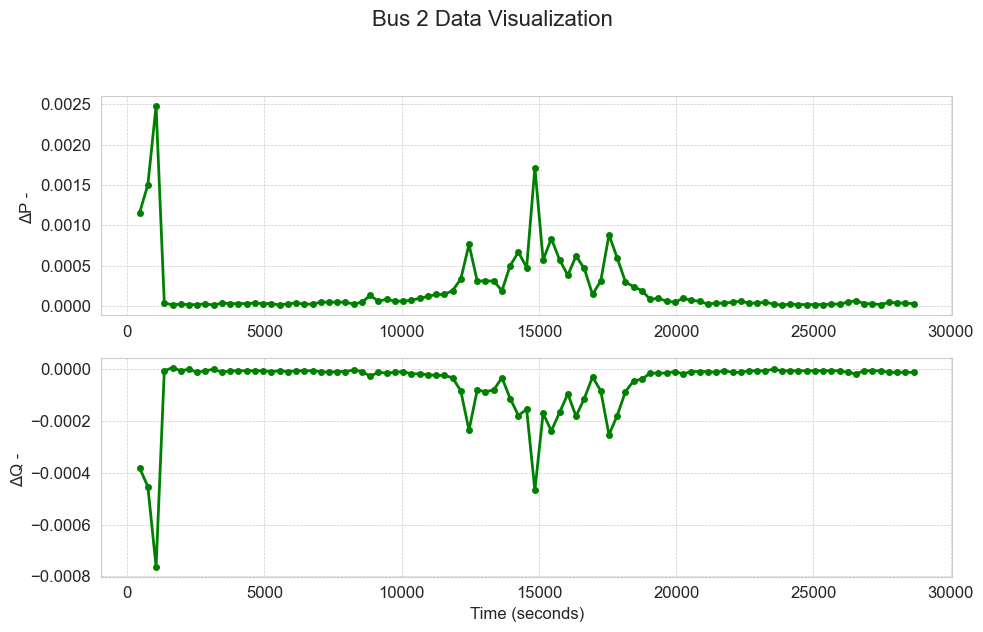

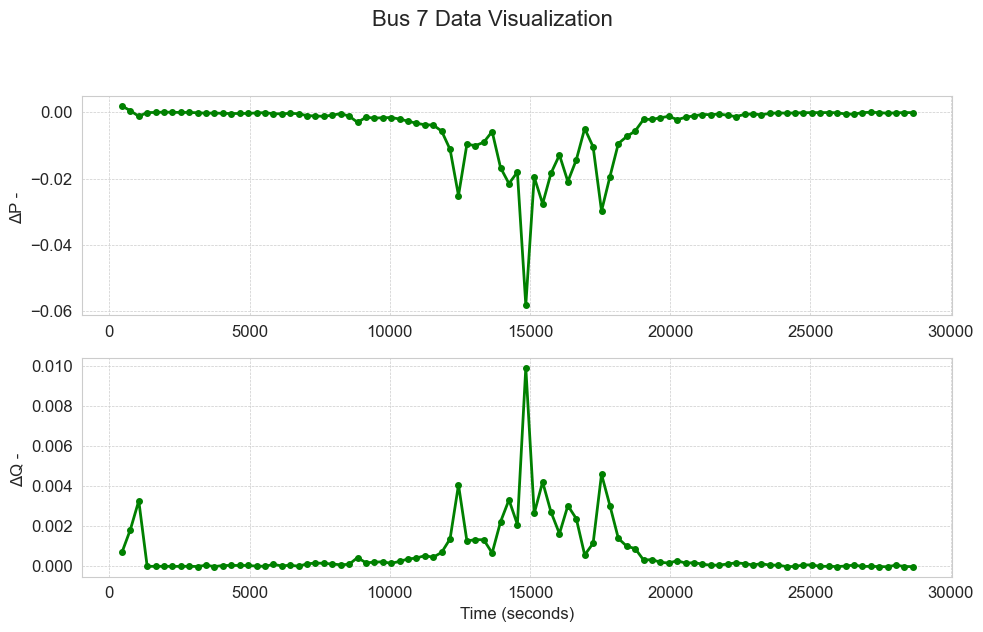

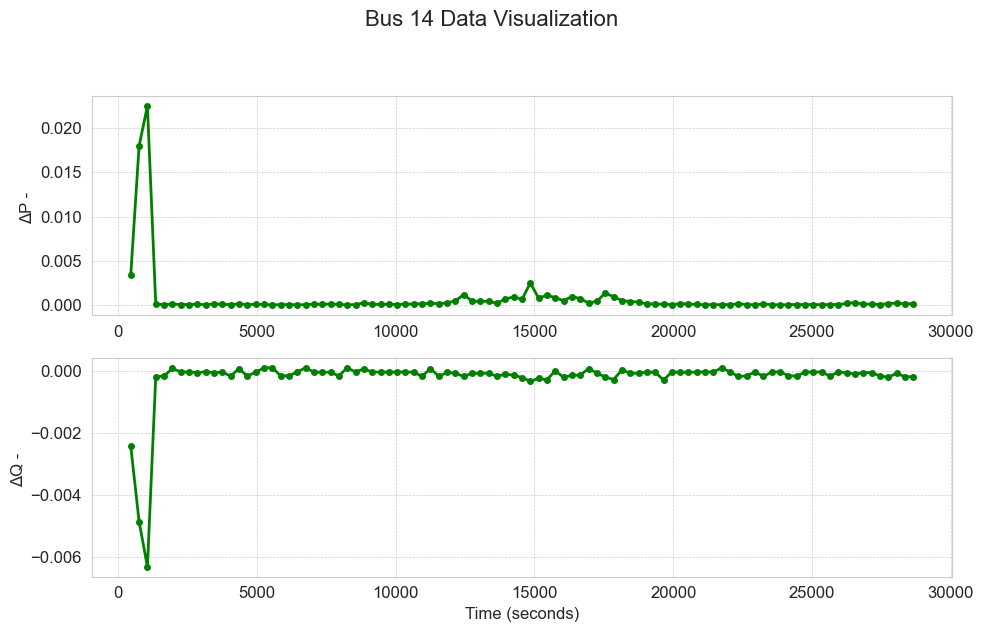

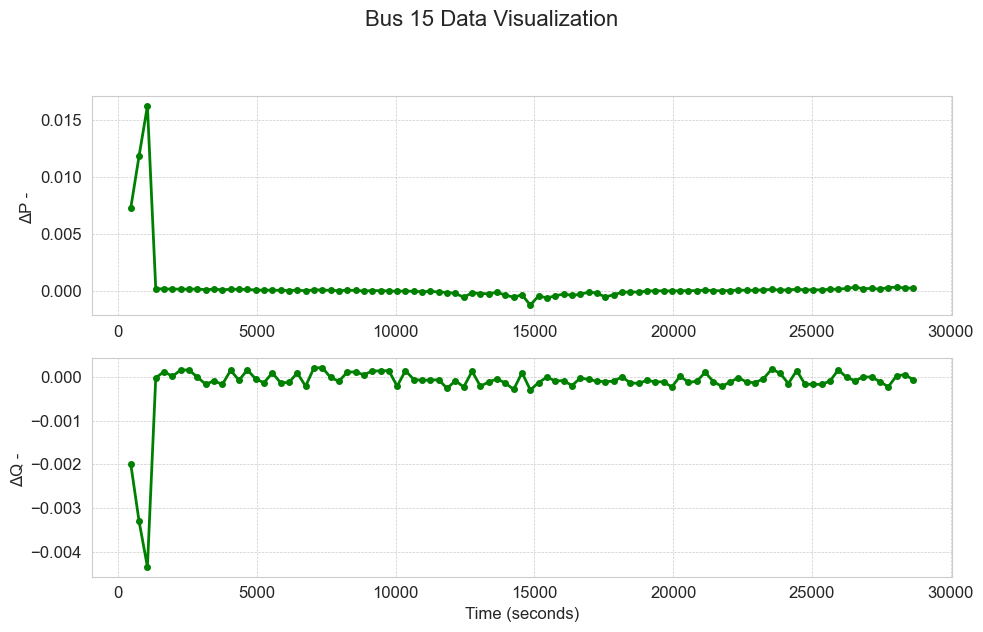

In [15]:
time = WecObj.wec_list[0].dataframe.time.to_list()[-1]
delta_p = {}
delta_q = {}
for bus in [2, 7, 14, 15]:
    WecObj._psse_plot_bus(bus_num=bus, time=[1, time], arg_1="ΔP", arg_2="ΔQ")

--- 
### Understanding Acceptable Mismatch Values in Power System Simulations

In power system operations, mismatches in power values are inevitable. However, it's essential that these mismatches stay within acceptable limits to ensure stable and reliable grid operations. 

**Key Points to Note:**

- **Acceptable Ranges**: For most grid operations, a mismatch value (both ΔP and ΔQ) within the range of ±0.1% of the total system power is deemed acceptable. Values within this range suggest minor deviations, which are manageable and generally do not compromise system integrity.

- **Interpreting Values Within the Range**: Mismatch values within this narrow band reflect a well-balanced system. It indicates that the active and reactive power generated almost perfectly matches the power consumed by loads.

- **Implications of Values Outside the Range**: If mismatches exceed this threshold, it's an indication of potential issues in the grid. These can arise from various factors, including equipment malfunctions, unplanned load changes, or issues with power generation sources.

- **Monitoring and Action**: Continual monitoring of these values is crucial. If values persistently exceed the acceptable range, prompt corrective action or further investigation is necessary to mitigate potential risks to grid stability.

In summary, while minor mismatches in power values are a common occurrence, it's essential that they remain within defined acceptable limits. These defined boundaries ensure the grid's stable operation, even when introducing new elements like WECs.

---
